# Solving 2048 with MC tree search

In [1]:
import numpy as np
import time 
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import deque
import environment_2048

## Enviroment in Fortran

In [2]:
print(environment_2048.__doc__)

This module 'environment_2048' is auto-generated with f2py (version:2).
Functions:
  add2(m)
  merge(m,action,score)
  tm = available_moves(m)
  mat = reset()
  score_out,nmat = step(mat,act,score)
  bm = mc_tree(mat,ntry,depth)
.


# Graphics interface

In [3]:
def render(board,paso, title = 'Current game'):
        """ Draws a colored game board """
        cell_colors = {
            0: '#FFFFFF',
            2: '#EEE4DA',
            4: '#ECE0C8',
            8: '#ECB280',
            16:'#EC8D53',
            32:'#F57C5F',
            64:'#E95937',
            128:'#F3D96B',
            256:'#F2D04A',
            512:'#E5BF2E',
            1024:'#E2B814',
            2048:'#EBC502',
            4096:'#00A2D8',
            8192:'#9ED682',
            16384:'#9ED682',
            32768:'#9ED682',
            65536:'#9ED682',
            131072:'#9ED682',
        }
        
        ncols = 4
        nrows = 4

        # create the plots
        fig = plt.figure(figsize=(7,7))
        plt.suptitle(title)
        axes = [ fig.add_subplot(nrows, ncols, r * ncols + c) for r in range(0, nrows) for c in range(1, ncols+1) ]

        # add some data
        v = np.reshape(board, -1)
        for i, ax in enumerate(axes):
            ax.text(0.5, 0.5, str(int(v[i])), horizontalalignment='center', verticalalignment='center')
            ax.set_facecolor(cell_colors[int(v[i])])

        # remove the x and y ticks
        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])

        plt.show()
        plt.close()

# Timing without rendering

Game finished


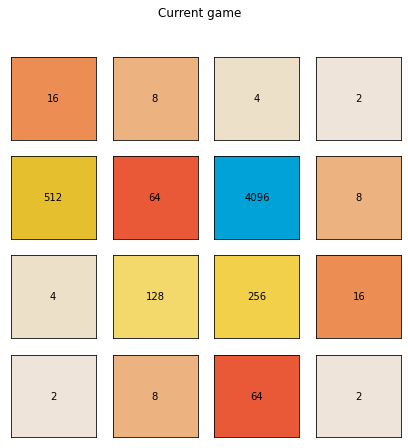

CPU times: user 1min 14s, sys: 1.17 s, total: 1min 16s
Wall time: 1min 16s


In [6]:
%%time
# up = 1, left = 2, down = 3, right = 4 default is up
env=environment_2048
state=env.reset()
tm=env.available_moves(state)
i=0
score=0
Nmoves=1
#rep = deque(maxlen=3)
best_possible=True
while Nmoves!=0:
    i+=1
    depth =10
    ntry =300
    tm=env.available_moves(state)
    avail_movs=np.delete(tm, np.where(tm==0))
    Nmoves=len(avail_movs)
    if Nmoves==0:
        print("Game finished")
        render(state,i)
        break
    
    moves_prob=env.mc_tree(state,ntry,depth)
    greedy_move=np.argmax(moves_prob)
    greedy_move+=1
    max_score=np.max(moves_prob)

    # It might happend that at some point later in the game, the best move from the tree search 
    # is not possible anymore (not available), so we might need to choose an action randomly 
    if greedy_move in avail_movs:
        best_possible=True
    else:
        best_possible=False
    if best_possible:
        greedy_move=greedy_move
    else:
        greedy_move=np.random.choice(avail_movs)
        
    score, state=env.step(state, greedy_move, score)

    print("max tile= %s" %(np.amax(state)) )
    clear_output(wait=True)
#     print("max tile= %s, avail_movs=%s, greedy_move=%s" %(np.amax(state),avail_movs, greedy_move) )
#     print(state)
#     clear_output(wait=True)
#     if (np.amax(state)==2048):
#         print("WIN!")
#         break

In [64]:
print("tm =%s, avail_movs=%s, np.argmax(moves_prob) =%s, greedy_move =%s" %(tm, avail_movs,np.argmax(moves_prob),greedy_move))

tm =[0 0 0 0], avail_movs=[], np.argmax(moves_prob) =0, greedy_move =2


# Observing the play by rendering it.

In [4]:
%%time
# up = 1, left = 2, down = 3, right = 4 default is up
env=environment_2048
state=env.reset()
tm=env.available_moves(state)
i=0
score=0
Nmoves=1
#rep = deque(maxlen=3)
best_possible=True
while Nmoves!=0:
    i+=1
    depth =10
    ntry =300
    tm=env.available_moves(state)
    avail_movs=np.delete(tm, np.where(tm==0))
    Nmoves=len(avail_movs)
    if Nmoves==0:
        print("Game finished")
        render(state,i)
        break
    
    moves_prob=env.mc_tree(state,ntry,depth)
    greedy_move=np.argmax(moves_prob)
    greedy_move+=1
    max_score=np.max(moves_prob)

    # It might happend that at some point later in the game, the best move from the tree search 
    # is not possible anymore (not available), so we might need to choose an action randomly 
    if greedy_move in avail_movs:
        best_possible=True
    else:
        best_possible=False
    if best_possible:
        greedy_move=greedy_move
    else:
        greedy_move=np.random.choice(avail_movs)
        
    score, state=env.step(state, greedy_move, score)
    render(state,i)
    print("max tile= %s" %(np.amax(state)) )
    clear_output(wait=True)

KeyboardInterrupt: 